# 1. Сетка
(подпакет mesh)

### 1.1 Чтение сетки:
(подпакет reader)

In [ ]:
from FEM.mesh.reader import KFileReader

In [ ]:
reader = KFileReader()

reader.readstream(open('doc/meshes/mini_test.k'))
result = reader.pop()

result

### 1.2 Визуализация сетки:
(подпакет mesh и mesh.plot)

In [ ]:
import matplotlib.pyplot as plt

from FEM.mesh import MeshClass, meshFrom

In [ ]:
mesh = meshFrom(name='doc/meshes/test.k')


plt.figure(figsize=(8, 8))

plt.gca().set_aspect('equal')
plt.title('Mesh visualization test')
mesh.visualizeWithSpecials([0, 1, 2], 
                           color=[[0.4, 0.4, 0.4, 1.0], "#A8A8A8"], spcolor=['g'],
                           hatch='.', sphatch='O', ls='-', lw=2.0, alpha=0.8)

### 1.3 Алгоритмы поиска:
(подпакет mesh и mesh.search)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from FEM.mesh import MeshClass, meshFrom
from FEM.mesh.search import StepsMeshSearch

In [ ]:
def checkStepsMethodFor(mesh, a, b):
    searcher = StepsMeshSearch(mesh)
    searcher.setArea(a)
    indx = searcher.search(b)
    
    plt.gca().set_aspect('equal')
    plt.title('Steps search test')
    
    plt.plot(*a, 'bo', markersize=8);
    plt.plot(*b, 'ro', markersize=8);
    mesh.visualizeWithSpecials(searcher.getPath())
    if indx != -1:
        mesh.visualizeSpecials([indx], color='b')

In [ ]:
mesh = meshFrom(name="doc/meshes/test.k")


plt.figure(figsize=(16, 16))

plt.subplot(331)
checkStepsMethodFor(mesh, np.array([-0.95, 0.95]), np.array([-0.95, -0.95]))

plt.subplot(332)
checkStepsMethodFor(mesh, np.array([-0.95, 0.95]), np.array([0.2, -0.95]))

plt.subplot(333)
checkStepsMethodFor(mesh, np.array([-0.95, 0.95]), np.array([0.5, -0.95]))

plt.subplot(334)
checkStepsMethodFor(mesh, np.array([0.95, 0.95]), np.array([-0.95, -0.95]))

plt.subplot(335)
checkStepsMethodFor(mesh, np.array([0.95, 0.95]), np.array([0.2, -0.95]))

plt.subplot(336)
checkStepsMethodFor(mesh, np.array([-0.95, -0.95]), np.array([0.2, 0.95]))

plt.subplot(337)
checkStepsMethodFor(mesh, np.array([-0.95, -0.95]), np.array([0.0, 0.0]))

plt.subplot(338)
checkStepsMethodFor(mesh, np.array([0.95, 0.95]), np.array([-1.1, 0.5]))

plt.subplot(339)
checkStepsMethodFor(mesh, np.array([-0.95, -0.95]), mesh.centers[10])

# 2. Интерполяция

In [ ]:
import numpy as np

from FEM.mesh import MeshClass, meshFrom
from FEM.interpolation import CentersInterpolator, StraightInterpolator

from visualization import visualizeCellsValues, visualizeNodesValues

In [ ]:
def getErr(a, b):
    """
    Абсолютная погрешность
    """
    
    return np.abs(a - b)

def getRelativeErr(a, b, eps=1e-100, limit=1.0):
    """
    Относительная погрешность
    """
    
    return np.minimum(2*np.abs(a - b)/(np.abs(a) + np.abs(b) + eps), limit)

In [ ]:
# Шаблоны функций для теста:
linearFunc        = lambda x, c: x@c[:2] + c[2]
trigonometricFunc = lambda x, a, b, c: linearFunc(np.array(
    [np.sin(linearFunc(x, a)), 
     np.cos(linearFunc(x, b))]
).T, c)

In [ ]:
# Функции для теста:
linearTestFunc1 = lambda x: linearFunc(x, np.array([10.0, 10.0, 1.0]))
linearTestFunc2 = lambda x: linearFunc(x, np.array([1.1, -4.2, 70.6]))
trigonTestFunc1 = lambda x: trigonometricFunc(x, np.array([1.0, 0.0, 0.0]), 
                                                 np.array([0.0, 1.0, 0.0]), 
                                                 np.array([4.0, -2.0, 10.0]))
trigonTestFunc2 = lambda x: trigonometricFunc(x, np.array([1.1, -4.2, 0.15]), 
                                                 np.array([-2.6, -0.8, 0.74]), 
                                                 np.array([6.3, 5.3, -30.8]))

In [ ]:
def visualizeInterpolErr(func, 
                         mesh=None, interpolator=None, file="meshes/test.k", 
                         **kwargs):
    """
    Интерполяция функции func через класс CentersInterpolator на сетке mesh
    и визуализация ошибки интерполяции на центрах элементов сетки
    """
    
    if mesh is None:
        mesh = meshFrom(name=file)
        
    if interpolator is None:
        interpolator = CentersInterpolator(mesh)
    
    visualizeCellsValues(mesh, getRelativeErr(func(mesh.centers), interpolator.apply(func(mesh.nodes))), **kwargs)

In [ ]:
mesh = meshFrom(name="doc/meshes/test.k")
interpolator = CentersInterpolator(mesh)


plt.figure(figsize=(16, 8))
plt.suptitle("Interpolation test for linear functions", fontsize=20, y=0.88)

plt.subplot(121)
plt.title("test function 1")
visualizeInterpolErr(linearTestFunc1, mesh, interpolator, bar_shrink=0.7)

plt.subplot(122)
plt.title("test function 2")
visualizeInterpolErr(linearTestFunc2, mesh, interpolator, bar_shrink=0.7)


plt.figure(figsize=(16, 8))
plt.suptitle("Interpolation test for trigonometric functions", fontsize=20, y=0.88)

plt.subplot(121)
plt.title("test function 1")
visualizeInterpolErr(trigonTestFunc1, mesh, interpolator, bar_shrink=0.7)

plt.subplot(122)
plt.title("test function 2")
visualizeInterpolErr(trigonTestFunc2, mesh, interpolator, bar_shrink=0.7)

In [ ]:
plt.figure(figsize=(15, 8))
plt.suptitle("Interpolation test for trigonometric function on different meshes", fontsize=16)

plt.subplot(231)
plt.title('mesh (0)')
visualizeInterpolErr(trigonTestFunc1, file="doc/meshes/test_0.k", bar_shrink=1.0)

plt.subplot(232)
plt.title('mesh (1)')
visualizeInterpolErr(trigonTestFunc1, file="doc/meshes/test_1.k", bar_shrink=1.0)

plt.subplot(233)
plt.title('mesh (2)')
visualizeInterpolErr(trigonTestFunc1, file="doc/meshes/test_2.k", bar_shrink=1.0)

plt.subplot(234)
plt.title('mesh (3)')
visualizeInterpolErr(trigonTestFunc1, file="doc/meshes/test_3.k", bar_shrink=1.0)

plt.subplot(235)
plt.title('mesh (4)')
visualizeInterpolErr(trigonTestFunc1, file="doc/meshes/test_4.k", bar_shrink=1.0)

plt.subplot(236)
plt.title('mesh (5)')
visualizeInterpolErr(trigonTestFunc1, file="doc/meshes/test_5.k", bar_shrink=1.0)

In [ ]:
def interpolListTest(func, points,
                     mesh=None, interpolator=None, file="meshes/test.k"): 
    """
    Интерполяция функции func через класс StraightInterpolator на сетке mesh
    и визуализация ошибки интерполяции на точках points
    """
    
    if mesh is None:
        mesh = MeshClass(open(file))
        
    if interpolator is None:
        interpolator = StraightInterpolator(mesh)
        
    err = getRelativeErr(func(points), interpolator.apply(points, func(mesh.nodes)))
    plt.plot(err)

In [ ]:
line1 = np.linspace([-0.99, -0.99], [0.99, 0.00], 100)
line2 = np.linspace([-0.99, -0.99], [0.00, 0.99], 100)


plt.figure(figsize=(15, 12))
plt.suptitle("Interpolation test along lines on different meshes", fontsize=16, y=0.92)

mesh = meshFrom(name="doc/meshes/test_1.k")

plt.subplot(321)
plt.title('mesh (1)', loc='left')
interpolListTest(trigonTestFunc1, line1, mesh)

plt.subplot(322)
interpolListTest(trigonTestFunc1, line2, mesh)


mesh = meshFrom(name="doc/meshes/test_3.k")

plt.subplot(323)
plt.title('mesh (3)', loc='left')
interpolListTest(trigonTestFunc1, line1, mesh)

plt.subplot(324)
interpolListTest(trigonTestFunc1, line2, mesh)


mesh = meshFrom(name="doc/meshes/test_5.k")

plt.subplot(325)
plt.title('mesh (5)', loc='left')
interpolListTest(trigonTestFunc1, line1, mesh)

plt.subplot(326)
interpolListTest(trigonTestFunc1, line2, mesh)

# 3. Численное решение уравнений линейной упругости

In [30]:
import numpy as np
import scipy.sparse.linalg as sp
import matplotlib.pyplot as plt

import FEM as fm
from FEM.mesh import MeshClass, meshFrom
from FEM.interpolation import CentersInterpolator, StraightInterpolator

from visualization import visualizeCellsValues, visualizeNodesValues

import kirschProblem.solution as krch

In [2]:
def getErr(a, b):
    """
    Абсолютная погрешность
    """
    
    return np.abs(a - b)

def getRelativeErr(a, b, eps=1e-100, limit=1.0):
    """
    Относительная погрешность
    """
    
    return np.minimum(2*np.abs(a - b)/(np.abs(a) + np.abs(b) + eps), limit)

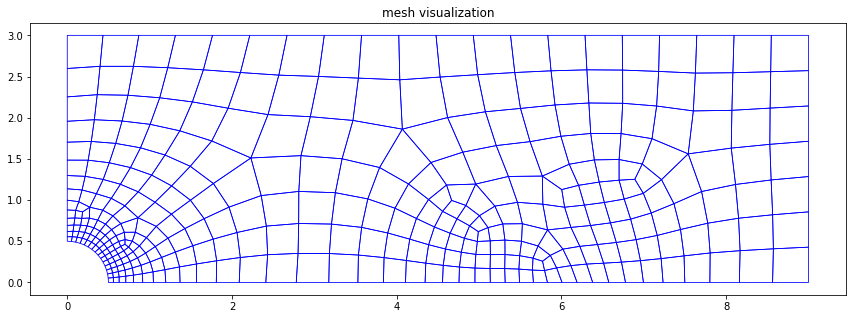

In [13]:
# Свойства материала:
E = 2e7
mu = 0.25
G = E/(2*(1 + mu))
D = fm.getD(E, mu)

# Геометрия объекта:
l, h, t, r = 9, 3, 1, 0.5
bar_shrink = 0.9

# Напряжения на границе:
p = 120000
p /= (4*h*t)


mesh = meshFrom(name="doc/meshes/kirsch/s1.k")
mesh.computeCenters()

plt.figure(figsize=(16, 5))

plt.gca().set_aspect('equal')
plt.title('mesh visualization')

mesh.visualize(color='b', lw=0.8)

### Вычисляем точное решение (задача Кирша):

In [14]:
krchU = np.array([krch.getKrchU(point, r, p, mu, G) for point in mesh.nodes])
krchStress = np.array([krch.getKrchStressT(point, r, p) for point in mesh.nodes])

In [15]:
krchUCenters = np.array([krch.getKrchU(point, r, p, mu, G) for point in mesh.centers])
krchStressCenters = np.array([krch.getKrchStressT(point, r, p) for point in mesh.centers])

In [16]:
krchInterpolStrainCenters = fm.getCellsStrain(mesh, krchU)
krchInterpolStressCenters = krchInterpolStrainCenters@D

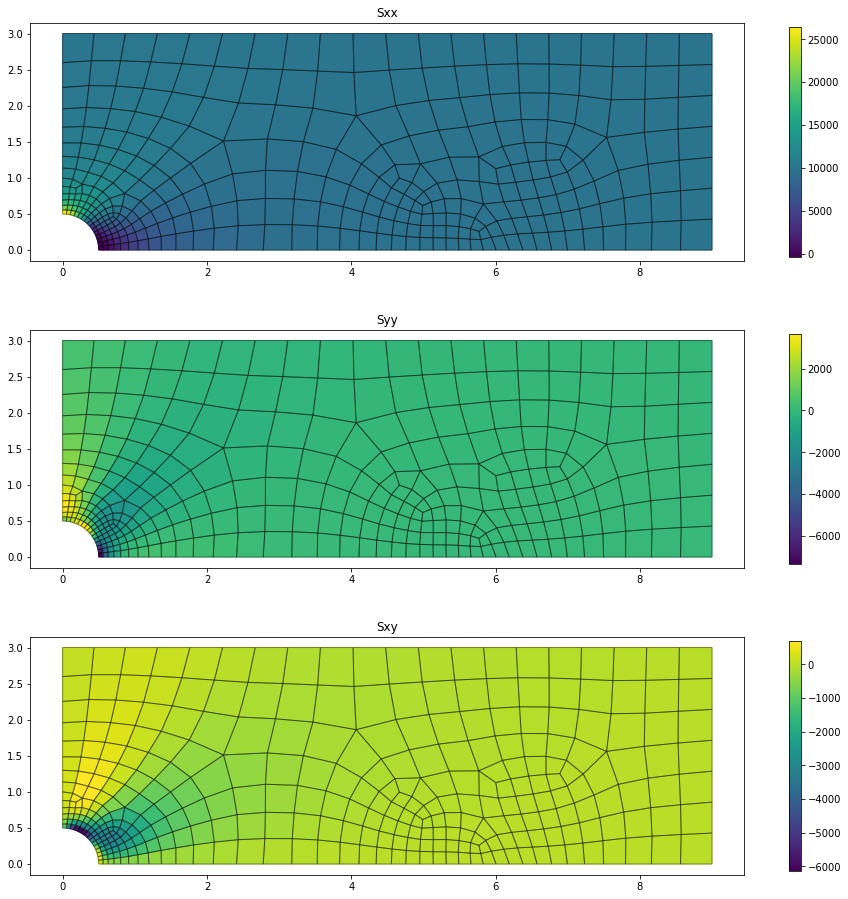

In [17]:
plt.figure(figsize=(16, 16))

plt.subplot(311)
plt.title('Sxx')
visualizeCellsValues(mesh, krchStressCenters[:, 0], 
                     contour=True, bar_shrink=bar_shrink)

plt.subplot(312)
plt.title('Syy')
visualizeCellsValues(mesh, krchStressCenters[:, 1], 
                     contour=True, bar_shrink=bar_shrink)

plt.subplot(313)
plt.title('Sxy')
visualizeCellsValues(mesh, krchStressCenters[:, 2], 
                     contour=True, bar_shrink=bar_shrink)

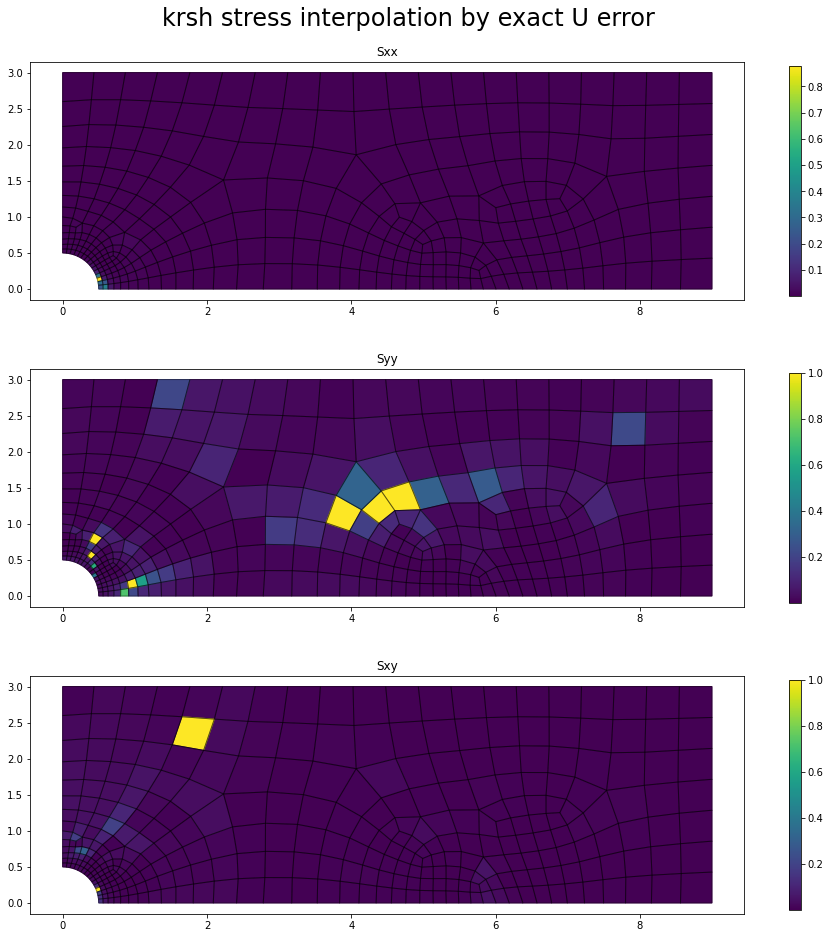

In [18]:
plt.figure(figsize=(16, 16))
plt.suptitle('krsh stress interpolation by exact U error              ', fontsize=24, y=0.92)

plt.subplot(311)
plt.title('Sxx')
visualizeCellsValues(mesh, getRelativeErr(krchStressCenters[:, 0], krchInterpolStressCenters[:, 0], limit=1), 
                     contour=True, bar_shrink=bar_shrink)

plt.subplot(312)
plt.title('Syy')
visualizeCellsValues(mesh, getRelativeErr(krchStressCenters[:, 1], krchInterpolStressCenters[:, 1], limit=1), 
                     contour=True, bar_shrink=bar_shrink)

plt.subplot(313)
plt.title('Sxy')
visualizeCellsValues(mesh, getRelativeErr(krchStressCenters[:, 2], krchInterpolStressCenters[:, 2], limit=1), 
                     contour=True, bar_shrink=bar_shrink)

### Составляем систему:

In [19]:
K, F = fm.getK(mesh, D), fm.getF(mesh)
#fm.setFNeiman(mesh, F, p, fm.vertBorder(-l))
fm.setFNeiman(mesh, F, p, fm.vertBorder( l))
fm.fixAxis(mesh, K, F, 0, fm.vertBorder(0.0))
fm.fixAxis(mesh, K, F, 1, fm.horzBorder(0.0))

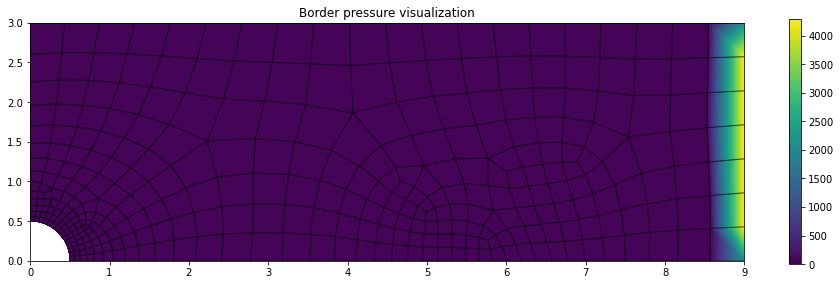

In [20]:
plt.figure(figsize=(16, 5))

plt.title("Border pressure visualization")
visualizeNodesValues(mesh, F[0::2] + F[1::2], levels=50, 
                     contour=True, bar_shrink=bar_shrink)

In [21]:
U = sp.cg(K, F)[0].reshape(-1, 2)

In [22]:
# Перемещения на границе (должны быть нули)
U[np.where(np.isclose(mesh.nodes[:, 0], 0.0))[0], 0], U[np.where(np.isclose(mesh.nodes[:, 1], 0.0))[0], 1]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]))

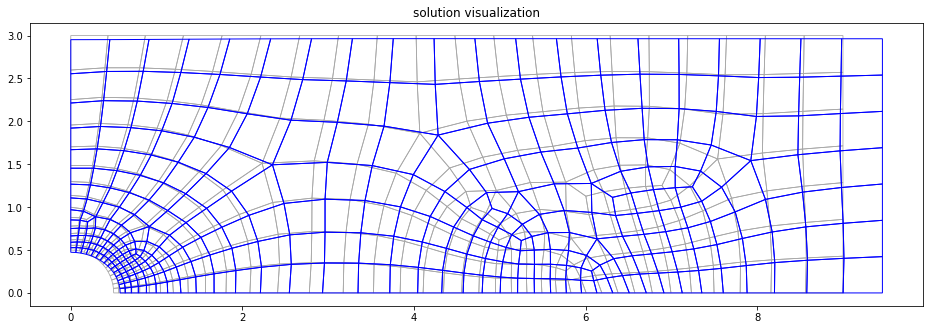

In [23]:
plt.figure(figsize=(16, 12))

plt.gca().set_aspect('equal')
plt.title('solution visualization')

mesh.resetNodes()
mesh.visualize(color=['#A7A7A7'], lw=0.8)

mesh.shiftNodes(100*U)
mesh.visualize(color=['b'], lw=1.0)

### Сравнение точных перемещений и численного решения:

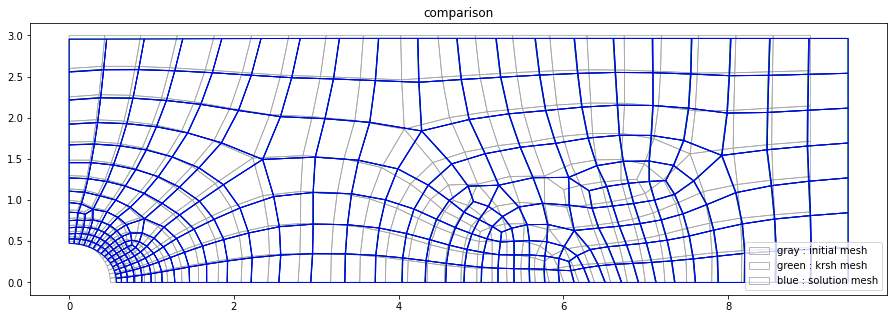

In [24]:
plt.figure(figsize=(16, 5))

plt.gca().set_aspect('equal')
plt.title('comparison')

mesh.resetNodes()
mesh.visualize(color=['#A7A7A7'], lw=0.8)

mesh.shiftNodes(100*krchU)
mesh.visualize(color=['g'], lw=1.0)

mesh.shiftNodes(100*U)
mesh.visualize(color=['b'], lw=1.0)

plt.legend(["gray : initial mesh", "green : krsh mesh", "blue : solution mesh"], loc="lower right")

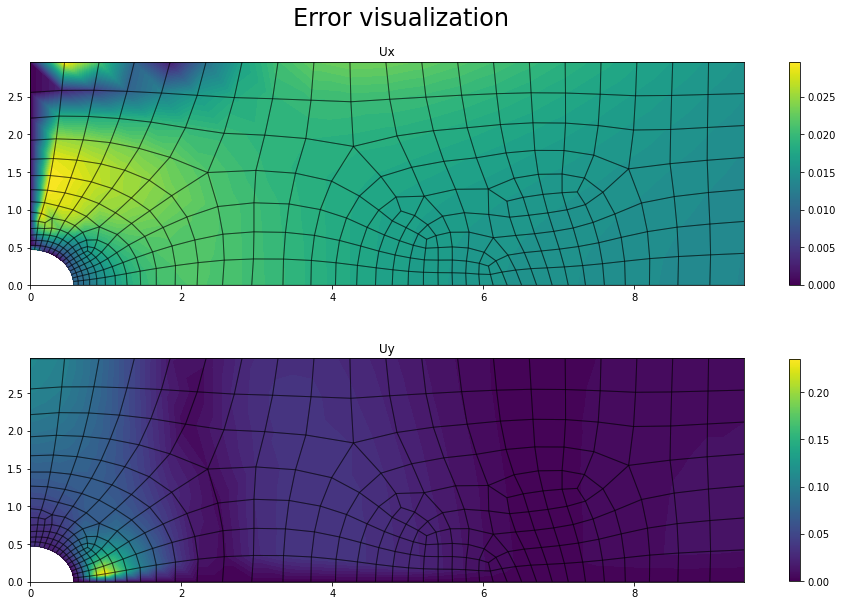

In [25]:
plt.figure(figsize=(16, 10))
plt.suptitle('Error visualization                ', fontsize=24, y=0.94)

plt.subplot(211)
plt.title("Ux")
visualizeNodesValues(mesh, getRelativeErr(U[:, 0], krchU[:, 0]), levels=50, 
                     contour=True, bar_shrink=bar_shrink)

plt.subplot(212)
plt.title("Uy")
visualizeNodesValues(mesh, getRelativeErr(U[:, 1], krchU[:, 1]), levels=50, 
                     contour=True, bar_shrink=bar_shrink)

### Визуализация решения:

In [26]:
strain = fm.getCellsStrain(mesh, U)
stress = strain@D
print(stress[:, 0].max(), stress[:, 0].max()/(3*p))

26901.868789216798 0.89672895964056


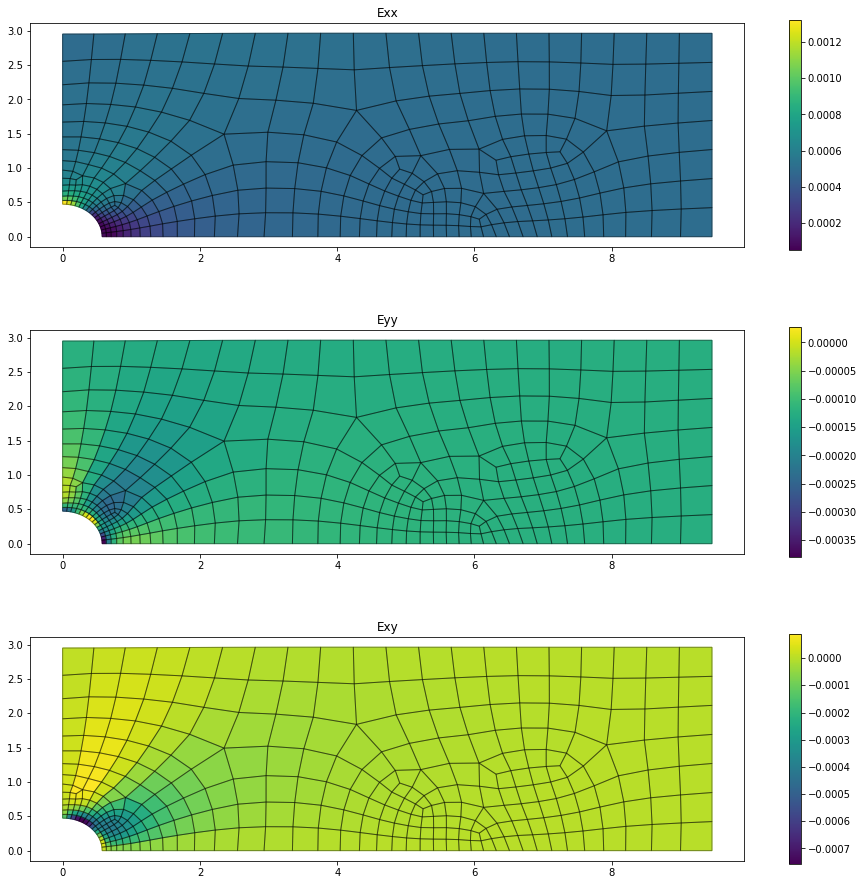

In [27]:
plt.figure(figsize=(16, 16))

plt.subplot(311)
plt.title('Exx')
visualizeCellsValues(mesh, strain[:, 0], contour=True, bar_shrink=bar_shrink)

plt.subplot(312)
plt.title('Eyy')
visualizeCellsValues(mesh, strain[:, 1], contour=True, bar_shrink=bar_shrink)

plt.subplot(313)
plt.title('Exy')
visualizeCellsValues(mesh, strain[:, 2], contour=True, bar_shrink=bar_shrink)

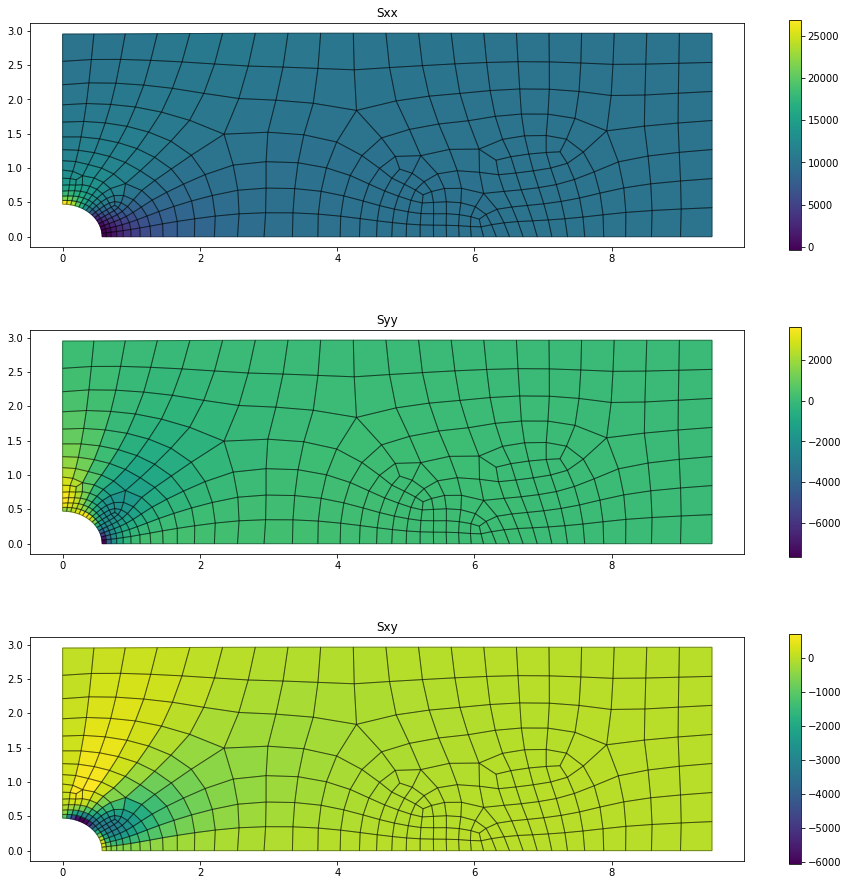

In [28]:
plt.figure(figsize=(16, 16))

plt.subplot(311)
plt.title('Sxx')
visualizeCellsValues(mesh, stress[:, 0], contour=True, bar_shrink=bar_shrink)

plt.subplot(312)
plt.title('Syy')
visualizeCellsValues(mesh, stress[:, 1], contour=True, bar_shrink=bar_shrink)

plt.subplot(313)
plt.title('Sxy')
visualizeCellsValues(mesh, stress[:, 2], contour=True, bar_shrink=bar_shrink)

### Метод согласованных результантов:

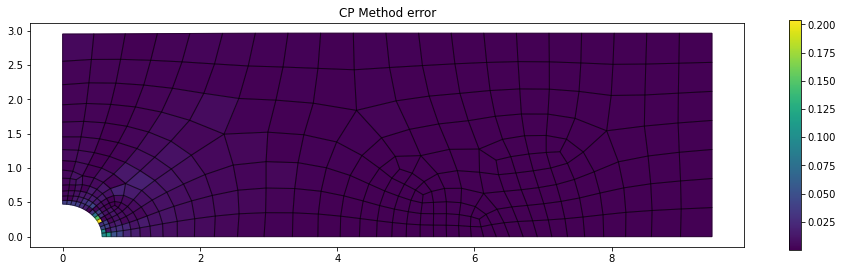

In [31]:
plt.figure(figsize=(16, 16))

plt.subplot(311)
plt.title("CP Method error")
visualizeCellsValues(mesh, getRelativeErr(strain[:, 0], 
                                          CentersInterpolator(mesh).apply(fm.applyCP(mesh, strain[:, 0]))), 
                     contour=True, bar_shrink=bar_shrink)

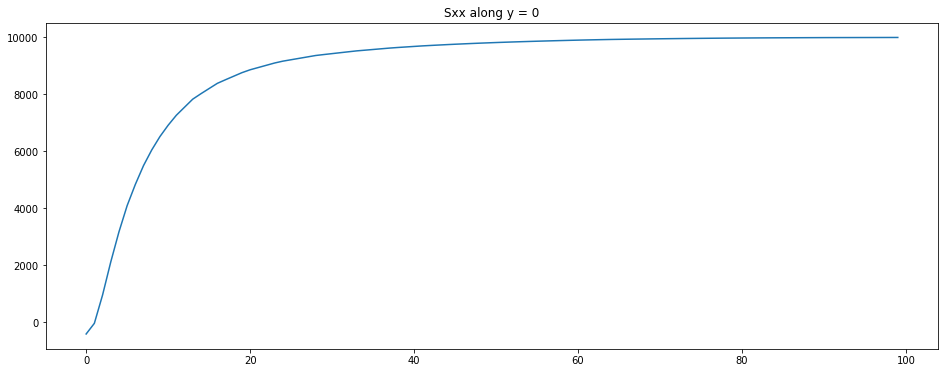

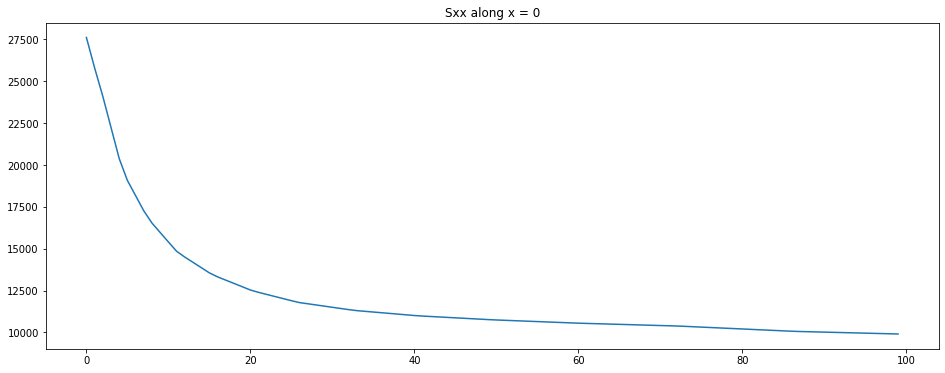

In [32]:
line1 = np.linspace([0.51, 0.01], [8.5, 0.01], num=100)
line2 = np.linspace([0.01, 0.51], [0.01, 2.9], num=100)
line3 = np.linspace([0.355, 0.355], [8.5, 2.8], num=100)

plt.figure(figsize=(16, 6))
plt.title("Sxx along y = 0")
plt.plot(StraightInterpolator(mesh).apply(line1, fm.applyCP(mesh, stress[:, 0])))

plt.figure(figsize=(16, 6))
plt.title("Sxx along x = 0")
plt.plot(StraightInterpolator(mesh).apply(line2, fm.applyCP(mesh, stress[:, 0])))

# КОНЕЦ